# Weight prediction

## 1. Problem

* The fact is that we cannot predict a person's `weight` through their `height`, because `weight` depends on many other factors. 
* However, base on the notebook purpose is using **Linear Regression**, we assume that it can be predicted.

In [55]:
import pandas as pd
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("./data.csv")

Given a dataset about human's **height (cm)** and **weight (kg)** of 15 people

In [57]:
df

,height,weight
0,147,49
1,150,50
2,153,51
3,155,52
4,158,54
5,160,56
6,163,58
7,165,59
8,168,60
9,170,72


* We can realize that `weight` is proportional to `height` (the taller, the heavier), so we can user **Linear Regression** model for this prediction. 
* To check the accuracy of the found model, we will keep the 155 cm and 160 cm data points for testing, the remaining dataset are used to train the model.

In [ ]:
test_df = df[df['height'].isin([155, 160])]
train_df = df[~df['height'].isin([155, 160])]

## 2. Data visualization

In [82]:
X = train_df[['height']].values
print(f"Shape: {X.shape}")
X

Shape: (13, 1)


array([[147],
       [150],
       [153],
       [158],
       [163],
       [165],
       [168],
       [170],
       [173],
       [175],
       [178],
       [180],
       [183]])

In [83]:
Y = train_df[['weight']].values
print(f"Shape: {Y.shape}")
Y

Shape: (13, 1)


array([[49],
       [50],
       [51],
       [54],
       [58],
       [59],
       [60],
       [72],
       [63],
       [64],
       [66],
       [67],
       [68]])

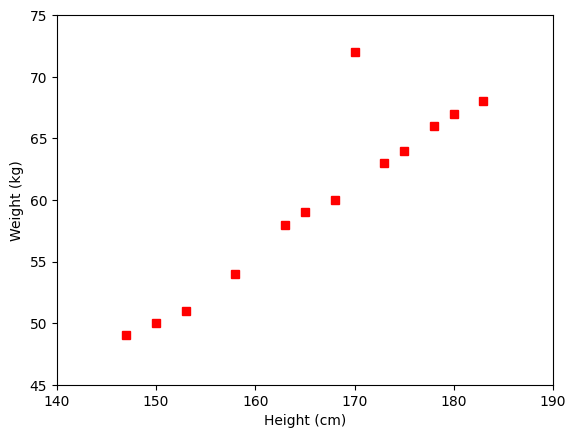

In [91]:
plt.plot(X, Y, 'rs')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## 3. Solution with Normal Equation

From this graph, we can see that the data is arranged almost in a straight line (except the `outlier` x = 170, y = 72), so the **Linear Regression** most likely to give a good results with this `hypothesis`: 
$$
\hat{y} = \theta_1 \cdot \text{x} + \theta_0
$$

or, in words:

$$
\text{(predicted weight)} = \theta_1 \cdot \text{(given height)} + \theta_0
$$

For simplicity, if we **assume the line goes through the origin** (no intercept), then the `hypothesis` reduces to:

$$
\hat{y} = \theta \cdot x
$$


After defining the `hypothesis`, we need to initialize a random `theta` and calculate `predicted_weight`. 

For example:
* With `theta` = 1, `x` = 147 and `actual_weight` = 49, `predicted_weight` will be calculated by: 

$$
\hat{y} = 1 \cdot 147 = 147 > \text{actual weight(49)}
$$

* With `theta` = 1, `x` = 150 and `actual_weight` = 50, `predicted_weight` will be calculated by: 

$$
\hat{y} = 1 \cdot 150 = 150 > \text{actual weight(50)}
$$

So we need a way to measure **how wrong our prediction is**. This is where the `Loss Function` comes in.  

The most common loss function in **Linear Regression** is the **Mean Squared Error (MSE)**:

$$
J(\theta = 1) = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$$

$$
= \frac{1}{2} \sum_{i=1}^2 \left( y_i - 1 \cdot x_i \right)^2
$$

$$
= \frac{1}{2} [\left(y_1 - 1 \cdot x_1 \right)^2 + \left(y_2 - 1 \cdot x_2 \right)^2]
$$

$$
= \frac{1}{2} [\left(49 - 1 \cdot 147 \right)^2 + \left(50 - 1 \cdot 150 \right)^2]
$$

$$
= 9802
$$

- If the predicted values are close to the actual values, the loss will be small.  
- If the predicted values are far away, the loss will be large.  

So, our goal is to find the value of **theta** that **minimizes** this loss function (by Derivative).

We have Loss Function (MSE) for n sample:

$$
J(\theta) = \frac{1}{n}\sum_{i=1}^n (y_i - \theta x_i)^2
$$

Take the derivative according to `theta`:

$$
\frac{dJ}{d\theta}
= \frac{1}{n}\sum_{i=1}^n 2 (y_i - \theta x_i)\cdot(-x_i)
= -\frac{2}{n}\sum_{i=1}^n x_i (y_i - \theta x_i)
$$

To find the minimum, let the derivative = 0:

$$
-\frac{2}{n}\sum_{i=1}^n x_i (y_i - \theta x_i) = 0
\quad\Longrightarrow\quad
\sum_{i=1}^n x_i y_i - \theta \sum_{i=1}^n x_i^2 = 0
$$

Hence the solution for `theta`:

$$
\boxed{\;\theta = \dfrac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}\;}
$$

We can check that it is a minimum using the second derivative:

$$
\frac{d^2 J}{d\theta^2} = \frac{2}{n}\sum_{i=1}^n x_i^2
\qquad
with 
\qquad
 \sum_{i=1}^n x_i^2 \ge 0, \sum_{i=1}^n x_i^2 > 0 \quad iff \exists i : x_i \ne 0
$$

---

* Definition:
  * `Hypothesis` (n): The model's presumption regarding the connection between the input features and the result.
  * `Outlier` (n): A data point that significantly deviates from the majority of observations in a dataset.

